# Exercise on neural networks (part 1)
In this exercise we will have a look at fully connected neural networks (FCNN) for a regression task and a classification task.

## Neural Networks: motivation
### NN for regression tasks
We have already seen in previous exercises how to use linear and non-linear regression for regression tasks and supervised classification. At this point the question can arise: if we are able to perform regression and classification with other algorithms, why do we need Neural Networks (NN)?

Non-linear regression can be useful in many cases where linear regression fails. But, as explained in the previous classes, to perform non-linear regression, we need to make an hypothesis on the function's form.

<img src="https://drive.google.com/uc?id=1tJblpmEEHXxVyampNU3gJlZJ1Bo3znTF" width="50%">

This information is often hard to get. When we can't make a valid hypothesis on the function's form, NN can be used as a tool to perform regression.

### NN for classification tasks
During the lectures on clustering, algorithms like k-means were shown to perform **unsupervised** classification, but another class of tasks includes **supervised** classification.
The difference between the two is very simple: in unsupervised algorithms we classify different kind of data based on the input space topology, while to perform supervised classification we need a **labeled** training dataset (that means, we already know the correct solution for the entire dataset). This dataset is used to "train" the Machine Learning algorithm, that once trained will be able to classify data also outside of the training dataset (hopefully).

<img src="https://drive.google.com/uc?id=1B7mKRexthHkbPZVUBUhmV6FUj-m52vzc" width="80%">

At this point again, we could think to perform supervised classification tasks using logistic regression. Why bothering with Neural Networks?
Classification of datasets with highly non-linear behaviour can be difficult with classic logistic regression techniques, and, in these cases, Neural Networks offer a good alternative to handle non-linearities.

<img src="https://drive.google.com/uc?id=1eNrMFltAQ1U7qXbHyL094WLjx4-x0w1h" width="80%">


## What's an FCNN?
A fully-connected neural network is a type of artificial neural network where every neuron in one layer is connected to every neuron in the next layer.

The basic structure of a fully-connected neural network is comprised of three types of layers: **input layer, hidden layer(s), and output layer**. The input layer takes in the input data, which could be anything from an image to a sound wave to a text document. The output layer produces the final output, which could be a classification label, a predicted value, or something else, depending on the problem being solved. The hidden layer(s) are layers between the input and output layers, where the actual computation happens. These layers consist of neurons that process the input data and pass it forward through the network.

Each neuron in a fully-connected neural network receives input from all the neurons in the previous layer, applies some kind of activation function to that input, and produces an output. The output of each neuron is then sent to every neuron in the next layer, and the process is repeated until the output layer is reached.

The number of neurons in the input layer is determined by the size of the input data, while the number of neurons in the output layer is determined by the desired output of the network. The number of neurons in the hidden layers is usually chosen based on experimentation and the complexity of the problem being solved.

<img src="https://drive.google.com/uc?id=1H6dht4wtOejJgYJtPhhBjVK8QfxPW6Ov" width=80%">

## Software

We use TensorFlow to build the NNs in this exercise. TensorFlow is quite easy to use and it has support for GPU acceleration. Another popular library is PyTorch, which is a bit more complex but also more flexible.

## Resources

* A really good series of videos from [3Brown1Blue](https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi)
* Pytorch [documentation](https://pytorch.org/docs/stable/index.html) and [tutorials](https://pytorch.org/tutorials/beginner/basics/intro.html)
* Neural Network intuition: https://playground.tensorflow.org
* The second dataset contains labeled [images](https://www.cs.toronto.edu/~kriz/cifar.html). The goal is to classify the images based on the label.



```
# This is formatted as code
```

# Ex 01: Regression task using Neural Networks

As in the previous case with non-linear regression, we want to find a function to approximate this noisy dataset built from the function:


Let's define the function to create our dataset:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

# function to regress:
def non_linear_func_orig(x):
    y = np.sin(x) + np.sin(1.5*x) + np.sin(2*x)
    return y

def non_linear_func(x):
    y = np.sin(x) + np.sin(1.5*x) + np.sin(2*x) + 0.15*np.random.randn(*x.shape)
    return y


we can use this code to create our dataset

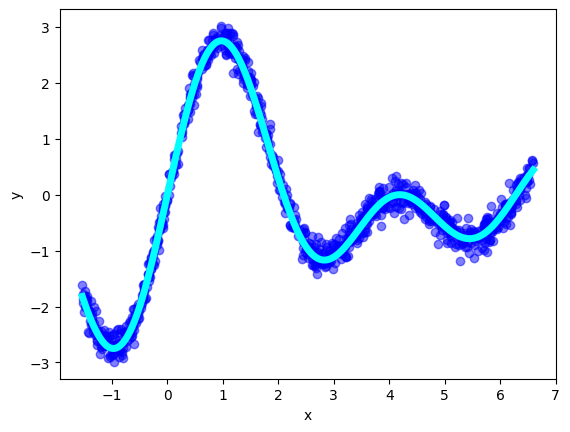

In [ ]:
# This code is used to create our synthetic dataset
n_samples = 1000
seed = 42
np.random.seed(seed)

X = np.random.rand(n_samples,1) * 2.6*np.pi - np.pi/2
Y = non_linear_func(X)

x_orig = np.linspace(X.min(), X.max(), 200).reshape(200,1)
y_orig = non_linear_func_orig(x_orig)

# We can plot the dataset and the original non-linear function
plt.scatter(X.T, Y.T, c='b', alpha=0.5, label='Data')
plt.plot(x_orig, y_orig, c='cyan', lw=5, label='Original Function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Building the Fully-Connected Neural Network

To build the architecture of the Neural Network, the first thing to do is understanding the function that is being studied.
In this case, the function we want to model with a FCNN is a function with one dependent variable and an independent one:

$y = f(x), \quad f: \mathbb{R}^1 \rightarrow \mathbb{R}^1$

This means that our Network needs to have one neuron in the input layer and one in the output layer.


Starting with a simple architecture, we can assign to the network two hidden layers, each one with a number of neurons that we define as a hyperparameter n_neurons.

<img src="https://drive.google.com/uc?id=1EBh4oFLgrREqznE_troVc9RRTGNCJRsC" width="80%">




In pytorch, the architecture of the neural network can be defined as a subclass of the nn.Module class (see pytorch [Documentation](https://pytorch.org/docs/stable/nn.html#module-torch.nn.modules.module)).

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network architecture
class MyNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(MyNeuralNetwork, self).__init__()
        self.layers = nn.ModuleList() # initialize the layers list as an empty list using nn.ModuleList()
        self.layers.append(nn.Linear(input_size, hidden_size)) # Add the first input layer. The layer takes as input <input_size> neurons and gets as output <hidden_size> neurons
        for _ in range(num_layers - 1):
            self.layers.append(nn.Linear(hidden_size, hidden_size)) # Add hidden layers
        self.layers.append(nn.Linear(hidden_size, output_size)) # add output layer

    def forward(self, x):    # Function to perform forward propagation
        for layer in self.layers[:-1]:
            x = torch.relu(layer(x))
        x = self.layers[-1](x)
        return x

## Forward Propagation
Now we try to perform forward propagation. The prediction will probably be very bad since we initialized random weights without training the network.

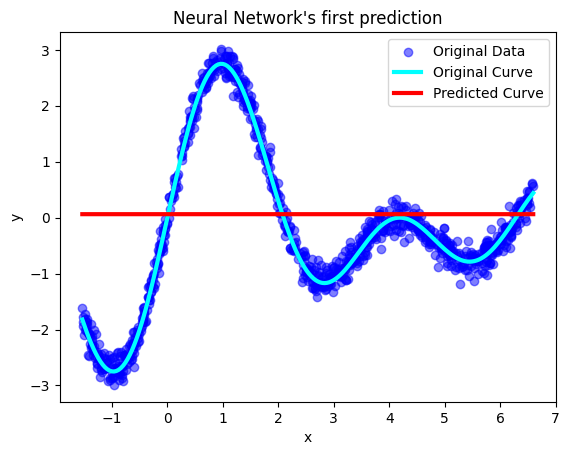

In [ ]:
input_size = 1
num_layers = 2
hidden_size = 32
output_size = 1
model = MyNeuralNetwork(input_size, hidden_size, output_size, num_layers)

with torch.no_grad():
    Y_first_pred = model(torch.tensor(x_orig, dtype=torch.float32))

plt.scatter(X, Y, c='b', alpha=0.5, label='Original Data')
plt.plot(x_orig, y_orig, c='cyan', lw=3, label='Original Curve')
plt.plot(x_orig, Y_first_pred.numpy(), c='red', lw=3, label='Predicted Curve')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Neural Network's first prediction")
plt.show()

## Split the data in training and test

Here we are splitting the data into training and test data, and also converting them to tensor objects, so that they can be used by the functions in pytorch.


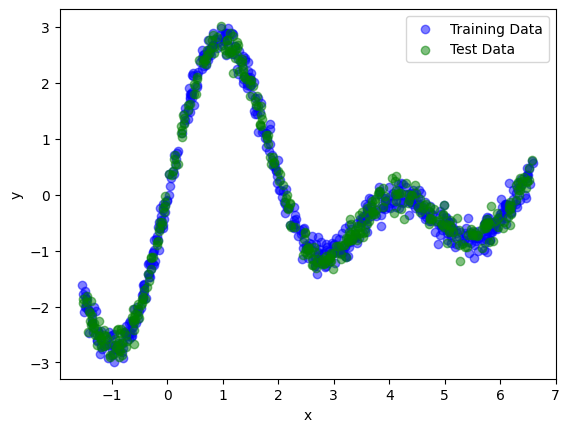

In [ ]:
from sklearn.model_selection import train_test_split
# Split the training data into a new training set and a validation set
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.4, random_state=42)

# Convert the variables to tensors so that they can be used in pytorch
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.float32)

plt.scatter(X_train, Y_train, c='b', alpha=0.5, label='Training Data')
plt.scatter(X_test, Y_test, c='g', alpha=0.5, label='Test Data')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Loss function design
To optimize the weights, a criteria is necessary. In the simplest case, the goal is to obtain the weights that minimize the error between the prediction of the FCNN and the correct value that we use as a comparison in the test phase.

So the first thing to think about is: how do we define the error?

In the following we are going to implement the MSE (Mean Squared Error) definition of the cost function (also called loss function):

$C = \frac{1}{N} \sum_{i=1}^{N} (Y_i - \hat{Y}_i)^2$

The cost function can assume more complex shapes, with additional hyperparameters, as we will see later in this exercise.




How does the cost function affect the Neural Network?


The cost function defines how "good" the output of the NN is. What we want to do is correct the neural network output so that it reduces the error, that is an optimization problem. The optimization aims to ***find the optimal Weights that minimize the cost function***. As many optimization algorithms for non-linear funcitons are based on gradient descent, it's necessary to compute the gradients.

In [ ]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters()) # here we are using the Adam optimizer, to optimize model.parameters, but what is there inside this attribute?

print("Weights and biases:")
for name, param in model.named_parameters():
    print(name, param.size())

Weights and biases:
layers.0.weight torch.Size([128, 1])
layers.0.bias torch.Size([128])
layers.1.weight torch.Size([128, 128])
layers.1.bias torch.Size([128])
layers.2.weight torch.Size([128, 128])
layers.2.bias torch.Size([128])
layers.3.weight torch.Size([128, 128])
layers.3.bias torch.Size([128])
layers.4.weight torch.Size([128, 128])
layers.4.bias torch.Size([128])
layers.5.weight torch.Size([128, 128])
layers.5.bias torch.Size([128])
layers.6.weight torch.Size([128, 128])
layers.6.bias torch.Size([128])
layers.7.weight torch.Size([128, 128])
layers.7.bias torch.Size([128])
layers.8.weight torch.Size([128, 128])
layers.8.bias torch.Size([128])
layers.9.weight torch.Size([128, 128])
layers.9.bias torch.Size([128])
layers.10.weight torch.Size([1, 128])
layers.10.bias torch.Size([1])


## Backpropagation
Backpropagation is the algorithm used to "train" the neural networks, which means solving the problem of ***computing the derivatives of the cost function with respect to each network weight***.

<img src="https://drive.google.com/uc?id=1P3KeBaeCXwx9oFMl0wf5ph63INLPOBYF" width="60%">

The computation at step 3 is fundamental in order to use gradient descent to solve the optimization problem.

In the previous lines of code, we have already set up the first two steps, so let's see how to implement backpropagation.





### Computation of the derivatives
In order to perform gradient descent on the weights, we want to obtain the derivatives and update the weights such that

$\mathbf{A}^{(l)}_{k+1} = \mathbf{A}^{(l)}_{k} + \alpha ∇C$

Where $\alpha$ is the learning rate, and

$\nabla C=\frac{∂C}{∂\mathbf{A}^{(l)}}$

is the vector with all the partial derivatives of the loss with respect to **ALL** the weights. Backpropagation is the algorithm that we use to compute this term, and is based on the chain rule.

A deeper explaination regarding the computation of derivatives can be found [here]()


## Perform one optimization step
Let's try to perform one optimization step of the neural network.

In [ ]:
# Steps 1 and 2 are already done, we initialized the neural network and initialized its weights to random values

# Step 3:
output = model(X_train)             # The training data X_train is run through the network to produce an output

loss = criterion(output, Y_train)  # Compute the loss

optimizer.zero_grad()               # Clears the gradients to avoid gradient accumulation
loss.backward()                     # Perform backpropagation to compute derivatives
optimizer.step()                    # Update the weights according to the gradient computation

# output2 = ...                     # Perform forward propagation again after having updated the weights
# loss2   = ...                     # Compute the loss

print("Loss before the optimization step: {:.4f}".format(loss))
print("Loss after the optimization step:  {:.4f}".format(loss2))


Loss before the optimization step: 2.0852
Loss after the optimization step:  2.0729


## Training loop

Epoch [100/1000], Loss: 0.0803, Test loss: 0.0837
Epoch [200/1000], Loss: 0.0681, Test loss: 0.0670
Epoch [300/1000], Loss: 0.0664, Test loss: 0.0635
Epoch [400/1000], Loss: 0.0571, Test loss: 0.0537
Epoch [500/1000], Loss: 0.0539, Test loss: 0.0507
Epoch [600/1000], Loss: 0.0440, Test loss: 0.0408
Epoch [700/1000], Loss: 0.0229, Test loss: 0.0239
Epoch [800/1000], Loss: 0.0213, Test loss: 0.0224
Epoch [900/1000], Loss: 0.0214, Test loss: 0.0227
Epoch [1000/1000], Loss: 0.0211, Test loss: 0.0225


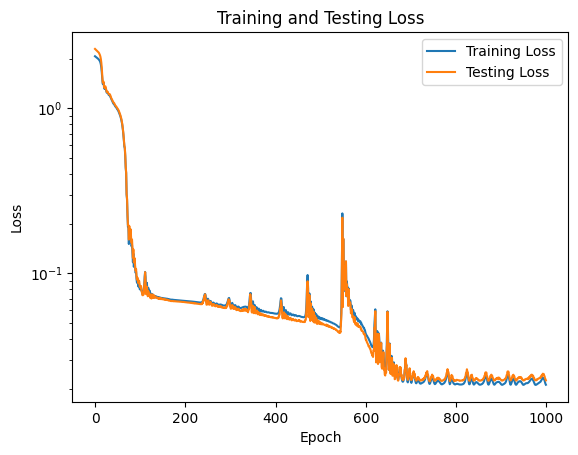

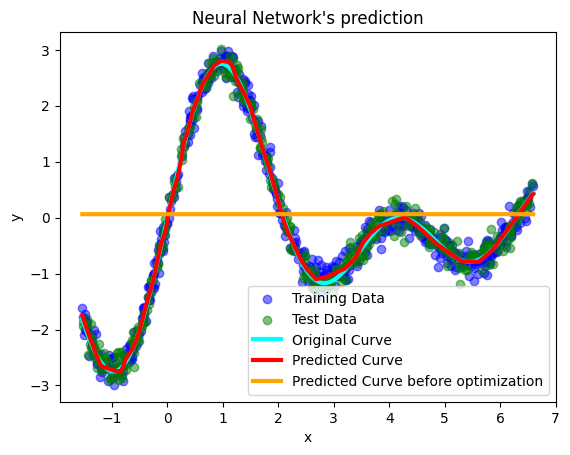

In [ ]:
# Lists to store training loss and testing loss
train_loss_list = []
test_loss_list = []

# Training loop
num_epochs = 1000
print('######################## Starting Training Loop ########################/n')
for epoch in range(num_epochs):
    # Forward pass on training data
    # output = ...

    # compute loss on training data
    # loss = ...

    # Compute loss on testing data. NOTE: we aren't gonna use the test loss for optimization!!!
    # output_test = ...
    # loss_test   = ...

    # Backprop and optimize
    # ...                       # Clear the gradients
    # ...                       # Perform backpropagation
    # ...                       # Update the weights

    train_loss_list.append(loss.item()) # Save the losses
    test_loss_list.append(loss_test.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Test loss: {loss_test.item():.4f}')

print('Finished training the Network\n')

# Plot training and testing loss
plt.plot(train_loss_list, label='Training Loss')
plt.plot(test_loss_list, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.yscale('log')
plt.legend()
plt.show()

# Plot the NN performance:
with torch.no_grad():
    Y_pred = model(torch.tensor(x_orig, dtype=torch.float32))
plt.scatter(X_train, Y_train, c='b', alpha=0.5, label='Training Data')
plt.scatter(X_test, Y_test, c='g', alpha=0.5, label='Test Data')
plt.plot(x_orig, y_orig, c='cyan', lw=3, label='Original Curve')
plt.plot(x_orig, Y_pred.numpy(), c='red', lw=3, label='Predicted Curve')
plt.plot(x_orig, Y_first_pred.numpy(), c='orange', lw=3, label='Predicted Curve before optimization')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Neural Network's prediction")
plt.show()

## Recap + bonus: regularization

Weights and biases:
layers.0.weight torch.Size([128, 1])
layers.0.bias torch.Size([128])
layers.1.weight torch.Size([128, 128])
layers.1.bias torch.Size([128])
layers.2.weight torch.Size([128, 128])
layers.2.bias torch.Size([128])
layers.3.weight torch.Size([128, 128])
layers.3.bias torch.Size([128])
layers.4.weight torch.Size([128, 128])
layers.4.bias torch.Size([128])
layers.5.weight torch.Size([128, 128])
layers.5.bias torch.Size([128])
layers.6.weight torch.Size([128, 128])
layers.6.bias torch.Size([128])
layers.7.weight torch.Size([128, 128])
layers.7.bias torch.Size([128])
layers.8.weight torch.Size([128, 128])
layers.8.bias torch.Size([128])
layers.9.weight torch.Size([128, 128])
layers.9.bias torch.Size([128])
layers.10.weight torch.Size([1, 128])
layers.10.bias torch.Size([1])
Epoch [100/1000], Loss: 2.0817, Test loss: 2.5315
Epoch [200/1000], Loss: 2.0655, Test loss: 2.5155
Epoch [300/1000], Loss: 2.0594, Test loss: 2.5088
Epoch [400/1000], Loss: 2.0543, Test loss: 2.5032
Epo

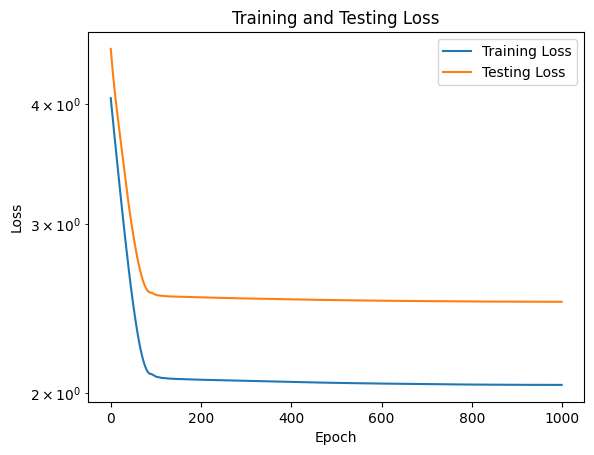

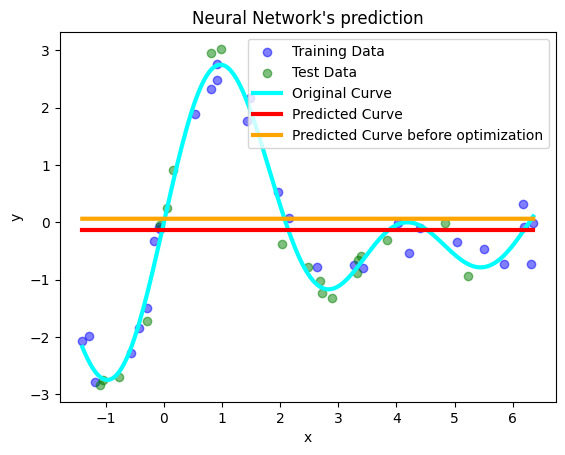

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

################################################################################
#                              Dataset generation
################################################################################
# function to regress:
def non_linear_func_orig(x):
    y = np.sin(x) + np.sin(1.5*x) + np.sin(2*x)
    return y

def non_linear_func(x):
    y = np.sin(x) + np.sin(1.5*x) + np.sin(2*x) + 0.30*np.random.randn(*x.shape)
    return y

# This code is used to create our synthetic dataset
n_samples = 50
seed = 42
np.random.seed(seed)

X = np.random.rand(n_samples,1) * 2.6*np.pi - np.pi/2
Y = non_linear_func(X)

x_orig = np.linspace(X.min(), X.max(), 200).reshape(200,1)
y_orig = non_linear_func_orig(x_orig)

# Split the training data into a new training set and a validation set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.4, random_state=42)

# Convert the variables to tensors so that they can be used in pytorch
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.float32)

################################################################################
#            Define the NN architecture, Loss function, optimizer
################################################################################
input_size = 1
num_layers = 10
hidden_size = 128
output_size = 1
model = MyNeuralNetwork(input_size, hidden_size, output_size, num_layers)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters()) # here we are using the Adam optimizer, to optimize model.parameters, but what is there inside this attribute?
lambda_reg = 0.0003

print("Weights and biases:")
for name, param in model.named_parameters():
    print(name, param.size())

################################################################################
#                             Training loop
################################################################################
# Lists to store training loss and testing loss
train_loss_list = []
test_loss_list = []

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    output = model(X_train)

    # compute loss on training data
    loss = criterion(output, Y_train)

    # Compute L1 regularization term
    l1_regularization = 0.0
    for param in model.parameters():
        l1_regularization += torch.norm(param, p=1)
    # Add regularization term to the loss
    loss += lambda_reg * l1_regularization

    # Compute loss on testing data. NOTE: we aren't gonna use the test loss for optimization!!!
    output_test = model(X_test)
    loss_test = criterion(output_test, Y_test) + lambda_reg*l1_regularization

    # Backprop and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_loss_list.append(loss.item()) # Save the losses
    test_loss_list.append(loss_test.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Test loss: {loss_test.item():.4f}')

# Plot training and testing loss
plt.plot(train_loss_list, label='Training Loss')
plt.plot(test_loss_list, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.yscale('log')
plt.legend()
plt.show()

# Plot the NN performance:
with torch.no_grad():
    Y_pred = model(torch.tensor(x_orig, dtype=torch.float32))
plt.scatter(X_train, Y_train, c='b', alpha=0.5, label='Training Data')
plt.scatter(X_test, Y_test, c='g', alpha=0.5, label='Test Data')
plt.plot(x_orig, y_orig, c='cyan', lw=3, label='Original Curve')
plt.plot(x_orig, Y_pred.numpy(), c='red', lw=3, label='Predicted Curve')
plt.plot(x_orig, Y_first_pred.numpy(), c='orange', lw=3, label='Predicted Curve before optimization')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Neural Network's prediction")
plt.show()


## Real case applications to LES of Combustion

<img src="https://drive.google.com/uc?id=1xs00MNTGtRDpLmvwKm4dAgwvXWj8DPEB" width="100%">
<img src="https://drive.google.com/uc?id=1oj4KW2XEoTNMGooOZ2dLXkBreE3qvveS" width="100%">

# Ex 02: Classification task using Neural Networks


## Dataset Generation and Plot

In [ ]:
################################################################################
#                          Dataset Generation
################################################################################
import numpy as np
import plotly.graph_objs as go

# Number of samples
num_samples = 2000

# Generate random values for features x1, x2, x3
x1 = np.random.rand(num_samples)
x2 = np.random.rand(num_samples)
x3 = np.random.rand(num_samples)

# Define the centers and radii of the spheres
center1 = np.array([0.5, 0.5, 0.2])
radius1 = 0.3

center2 = np.array([0.9, 0.9, 0.9])
radius2 = 0.4

center3 = np.array([0.1, 0.6, 0.9])
radius3 = 0.5

# Calculate the Euclidean distance between each point and the centers of the spheres
distances1 = np.sqrt(np.sum((np.column_stack((x1, x2, x3)) - center1)**2, axis=1))
distances2 = np.sqrt(np.sum((np.column_stack((x1, x2, x3)) - center2)**2, axis=1))
distances3 = np.sqrt(np.sum((np.column_stack((x1, x2, x3)) - center3)**2, axis=1))

# Create labels (y) based on whether the point is inside the spheres or not
y = np.where((distances1 <= radius1) | (distances2 <= radius2) | (distances3 <= radius2), 1, 0)
y = y.reshape(len(y), 1) # make it a column vector

# Stack the features into a single input array
X = np.column_stack((x1, x2, x3))
# Add some noise if not it's too easy
X = X + 0.12*np.random.rand(*X.shape)

################################################################################
#             Split into train and test, convert to tensor
################################################################################
# Split the training data into a new training set and a validation set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.4, random_state=42)

# Convert the variables to tensors so that they can be used in pytorch
# X_train = ...
# X_test  = ...
# Y_train = ...
# Y_test  = ...

################################################################################
#                                 Plot
################################################################################
# Create a trace for the scatter plot
trace = go.Scatter3d(
    x=X[:, 0],
    y=X[:, 1],
    z=X[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(),  # Color based on y value
        colorscale='tropic',  # Choose a colorscale
        opacity=0.6
    )
)
# Create a layout for the plot
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='X1'),
        yaxis=dict(title='X2'),
        zaxis=dict(title='X3')
    ),
    margin=dict(l=0, r=0, t=0, b=0)
)
# Create the figure
fig = go.Figure(data=[trace], layout=layout)
# Add a colorbar
colorbar = go.ColorBar(title='y')
fig.update_layout(coloraxis_colorbar=dict(title='y'))
# Show the plot
fig.show()

# # Plotting
# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')
# # Scatter plot with color based on y value
# scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='cool')
# # Adding a colorbar to show the mapping from y value to color
# colorbar = plt.colorbar(scatter)
# colorbar.set_label('y')
# ax.set_xlabel('X1')
# ax.set_ylabel('X2')
# ax.set_zlabel('X3')
# ax.set_title('3D Dataset Visualization')
# plt.show()

## Architecture, activation and loss function for classification
The architecture we are going to define includes an activation funciton that maps the results between 0 and 1. A popular choice is the sigmoid funciton:

<img src="https://drive.google.com/uc?id=1-LU3_WMQbL2QW7cwQjgAz4LWl3vUpOUh" width="100%">


### Categorial cross-entropy loss

It is the default loss function to use for multi-class classification problems (see pytorch [guide](https://pytorch.org/docs/stable/nn.html#loss-functions)) where each class is assigned a unique integer value from 0 to (num_classes – 1). Computes the cross-entropy loss between true labels and predicted labels.

$\mathrm{Loss}=-\sum_{i=1}^{N} y_i \cdot \mathrm{log} \hat{y}_i$



In [ ]:
################################################################################
#            Define the NN architecture, Loss function, optimizer
################################################################################
# Define the neural network architecture. With respect to the previous case we are changing the activation from ReLU to sigmoid
class ClassificationNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(ClassificationNeuralNetwork, self).__init__()
        self.layers = nn.ModuleList() # initialize the layers list as an empty list using nn.ModuleList()
        self.layers.append(nn.Linear(input_size, hidden_size)) # Add the first input layer. The layer takes as input <input_size> neurons and gets as output <hidden_size> neurons
        for _ in range(num_layers - 1):
            self.layers.append(nn.Linear(hidden_size, hidden_size)) # Add hidden layers
        self.layers.append(nn.Linear(hidden_size, output_size)) # add output layer

    def forward(self, x):    # Function to perform forward propagation
        for layer in self.layers[:-1]:
            x = torch.sigmoid(layer(x))                                         # Here is where the activation is defined
        x = torch.sigmoid(self.layers[-1](x))
        return x

input_size = 3
num_layers = 2
hidden_size = 32
output_size = 1
model = ClassificationNeuralNetwork(input_size, hidden_size, output_size, num_layers)

# Define loss function and optimizer
criterion = nn.BCELoss()                                                        # Here we defined the Binary Cross-Entropy loss
optimizer = optim.Adam(model.parameters()) # here we are using the Adam optimizer, to optimize model.parameters, but what is there inside this attribute?
lambda_reg = 0.00009

print("Weights and biases:")
for name, param in model.named_parameters():
    print(name, param.size())

Weights and biases:
layers.0.weight torch.Size([32, 3])
layers.0.bias torch.Size([32])
layers.1.weight torch.Size([32, 32])
layers.1.bias torch.Size([32])
layers.2.weight torch.Size([1, 32])
layers.2.bias torch.Size([1])


Epoch [500/10000], Loss: 0.1572, Test loss: 0.2088
Epoch [1000/10000], Loss: 0.1551, Test loss: 0.2104
Epoch [1500/10000], Loss: 0.1532, Test loss: 0.2125
Epoch [2000/10000], Loss: 0.1516, Test loss: 0.2146
Epoch [2500/10000], Loss: 0.1501, Test loss: 0.2168
Epoch [3000/10000], Loss: 0.1487, Test loss: 0.2189
Epoch [3500/10000], Loss: 0.1474, Test loss: 0.2208
Epoch [4000/10000], Loss: 0.1462, Test loss: 0.2226
Epoch [4500/10000], Loss: 0.1451, Test loss: 0.2243
Epoch [5000/10000], Loss: 0.1441, Test loss: 0.2262
Epoch [5500/10000], Loss: 0.1431, Test loss: 0.2283
Epoch [6000/10000], Loss: 0.1422, Test loss: 0.2310
Epoch [6500/10000], Loss: 0.1413, Test loss: 0.2337
Epoch [7000/10000], Loss: 0.1405, Test loss: 0.2362
Epoch [7500/10000], Loss: 0.1397, Test loss: 0.2386
Epoch [8000/10000], Loss: 0.1390, Test loss: 0.2411
Epoch [8500/10000], Loss: 0.1383, Test loss: 0.2433
Epoch [9000/10000], Loss: 0.1376, Test loss: 0.2454
Epoch [9500/10000], Loss: 0.1369, Test loss: 0.2475
Epoch [10000/

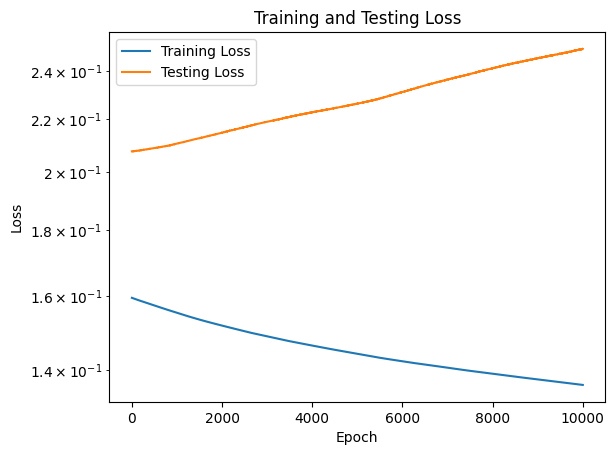

In [ ]:
################################################################################
#                             Training loop
################################################################################
# Lists to store training loss and testing loss
train_loss_list = []
test_loss_list = []

# Training loop
num_epochs = 10000
for epoch in range(num_epochs):
    # Forward pass
    output = model(X_train)

    # compute loss on training data
    loss = criterion(output, Y_train)

    # Compute L1 regularization term
    l1_regularization = 0.0
    for param in model.parameters():
        l1_regularization += torch.norm(param, p=1)
    # Add regularization term to the loss
    loss += lambda_reg * l1_regularization

    # Compute loss on testing data. NOTE: we aren't gonna use the test loss for optimization!!!
    output_test = model(X_test)
    loss_test = criterion(output_test, Y_test) + lambda_reg*l1_regularization

    # Backprop and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_loss_list.append(loss.item()) # Save the losses
    test_loss_list.append(loss_test.item())

    if (epoch + 1) % 500 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Test loss: {loss_test.item():.4f}')

# Discretize the output
Y_pred_test_discrete = model(X_test)
Y_pred_test_discrete[Y_pred_test_discrete<=0.5] = 0
Y_pred_test_discrete[Y_pred_test_discrete>0.5] = 1

Y_pred_train_discrete = model(X_train)
Y_pred_train_discrete[Y_pred_train_discrete<=0.5] = 0
Y_pred_train_discrete[Y_pred_train_discrete>0.5] = 1

predictions_train = torch.sum(torch.eq(Y_train, Y_pred_train_discrete))
predictions_test = torch.sum(torch.eq(Y_test, Y_pred_test_discrete))

print("\n#################### Performance of the Neural Network ####################")
print("Correct number of predictions in the training dataset: [{}/{}] ,  {:.2f}%".format(predictions_train, len(Y_train), predictions_train/len(Y_train)*100))
print("Correct number of predictions in the test dataset:     [{}/{}] ,  {:.2f}%\n".format(predictions_test, len(Y_test), predictions_test/len(Y_test)*100))

# Compute a tensor that only contains the errors
X_test_err = X_test[(Y_pred_test_discrete!=Y_test).squeeze(dim=1), :]
X_train_err = X_train[(Y_pred_train_discrete!=Y_train).squeeze(dim=1), :]

# Plot training and testing loss
plt.plot(train_loss_list, label='Training Loss')
plt.plot(test_loss_list, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.yscale('log')
plt.legend()
plt.show()


In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create traces for each subplot
traces = []
trace1 = go.Scatter3d(
        x=X_test[:, 0],
        y=X_test[:, 1],
        z=X_test[:, 2],
        mode='markers',
        marker=dict(
            size=5,
            color=Y_pred.flatten(),  # Color based on predicted values
            colorscale='tropic',  # Choose a colorscale
            opacity=0.6
        ),
        name='NN predictions on test dataset'
    )

trace2 = go.Scatter3d(
        x=X_test_err[:, 0],
        y=X_test_err[:, 1],
        z=X_test_err[:, 2],
        mode='markers',
        marker=dict(
            size=5,
            color='red',  # Color based on predicted values
            opacity=0.9
        ),
        name='Errors on test dataset'
    )

trace3 = go.Scatter3d(
        x=X_train_err[:, 0],
        y=X_train_err[:, 1],
        z=X_train_err[:, 2],
        mode='markers',
        marker=dict(
            size=5,
            color='red',  # Color based on predicted values
            opacity=0.9
        ),
        name=f'Errors on training dataset'
    )

# Create input for the computation of an isosurface
num_samples = 100000
x1 = np.random.rand(num_samples)
x2 = np.random.rand(num_samples)
x3 = np.random.rand(num_samples)
X_iso = np.transpose(np.vstack([x1,x2,x3]))
X_iso = torch.tensor(X_iso, dtype=torch.float32)
with torch.no_grad():
    Y_iso = model(X_iso)
Y_iso = Y_iso.numpy().flatten()
# Extract the points where Y_iso is approximately equal to isosurface_value
idx = (Y_iso < 0.8) & (Y_iso > 0.2)
x1_iso = x1[idx]
x2_iso = x2[idx]
x3_iso = x3[idx]

trace4 = go.Scatter3d(
    x=x1_iso,
    y=x2_iso,
    z=x3_iso,
    mode='markers',
        marker=dict(
            size=5,
            color='orange',
            opacity=0.9
        ),
        name=f'Decision Boundary'
)
traces.append(trace1)
traces.append(trace2)
traces.append(trace4)
traces.append(trace3)


# Create subplots
fig = make_subplots(rows=2, cols=2, specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}],
                                           [{'type': 'scatter3d'}, {'type': 'scatter3d'}]] )
# Add traces to subplots
for i, trace in enumerate(traces, 1):
    fig.add_trace(trace, row=(i-1)//2 + 1, col=(i-1)%2 + 1)

# Update layout
fig.update_layout(scene=dict(xaxis_title='X1', yaxis_title='X2', zaxis_title='X3'),
                  margin=dict(l=0, r=0, t=0, b=0),
                  height=800,  # Set the height of the entire figure
                  width=1200)  # Set the width of the entire figure

# Show the plot
fig.show()


# Contacts
In case you have some doubts on the exercises, or any additional quesiton, please contact me at the following e-mail:

lorenzo.piu@ulb.be